In [1]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
import progress_learner
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
# reload(value_estimator)
reload(action_learner_search)
reload(progress_learner)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

with tf.variable_scope("search") as scope:
    policy_estimator = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

projects = {}
progress_estimators = {}

# action_types = ["SlideToward", "SlideAway", "SlideNext", "SlidePast", "SlideAround"]
action_types = ["SlideAround"]

for project_name in action_types:
    print ('========================================================')
    print ('Load for action type = ' + project_name)
    p_name = project_name.lower() + "_project.proj"

    projects[project_name] = project.Project.load('../' + p_name)

    with tf.variable_scope("model") as scope:
        print('-------- Load progress model ---------')
        progress_estimators[project_name] = progress_learner.EventProgressEstimator(is_training=True, name = projects[project_name].name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)


Instructions for updating:
Please switch to tf.train.get_global_step
Load for action type = SlideAround


FileNotFoundError: [Errno 2] No such file or directory: '../slidearound_project.proj'

In [ ]:
for project_name in action_types:
    saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model/' + project_name))

    saver.restore(sess, '../progress_' + project_name + '.mod.0')

In [88]:
from rl import discrete_action_learner_search as dals
reload(dals)

<module 'rl.discrete_action_learner_search' from 'D:\\git\\learn-to-perform\\rl\\discrete_action_learner_search.py'>

In [89]:
c.progress_threshold=0.92
c.keep_branching = 24
c.branching = 24
reload(action_learner_search)
action_lns = {}
for project_name in action_types:
    action_lns[project_name] = dals.Discrete_ActionLearner_Search(c, projects[project_name], progress_estimators[project_name], session = sess)

In [90]:
def action_policy(config):
    """
    Given a config that has defined a playground
    """
    def boundary_constraint(action):
        action.flatten()
        # Ignore rotation
        for i in range(2):
            if action[i] < config.playground_x[i]:
                return False
            if action[i] > config.playground_x[i] + config.playground_dim[i]:
                return False
        
        return True
    
    return boundary_constraint
    
action_means, action_stds, actions = dals.quantized_random_action(c, action_lns['SlideAround'].env, 1, constraint_function = action_policy(c), no_of_actions = 24)

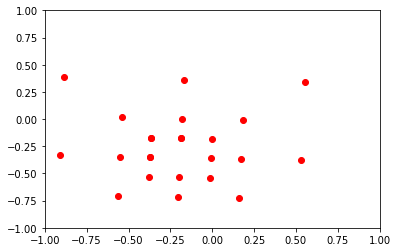

In [91]:
plt.plot([action[0] for action in actions], [action[1] for action in actions], 'ro')
plt.axis([-1, 1, -1, 1])
plt.show()

In [92]:
explorations = action_lns['SlideAround'].learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.6942955255508423), (0, 0.5961152911186218), (0, 0.11501152813434601), (0, 0.10746613889932632), (0, 0.07573208212852478), (0, 0.05198872089385986), (0, 0.01693287305533886), (0, 0.016206376254558563), (0, 0.009858692064881325), (0, 0.008138858713209629), (0, 0.0063564954325556755), (0, 0.00582853564992547), (0, 0.0037653655745089054), (0, 0.0036601319443434477), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
exploration_index = 9
exploration_index = 10
exploration_index = 11
exploration_index = 12
exploration_index = 13
exploration_index = 14
exploration_index = 15
exploration_index = 16
exploration_index = 17
exploration_index = 18
exploration_index = 19
exploration_index = 20

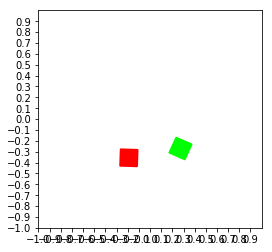

(array([ 0.45361049, -0.74665224,  1.14814463]), array([1., 1., 1.]))
[ 0.45361049 -0.74665224  1.14814463]
[[ 0.  -1.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 1.  -1.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 1.   0.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0. ]
 [ 0.   0.   1.   0.   1.   0.   0. ]]
Progress = 0.08; reward = 0.08


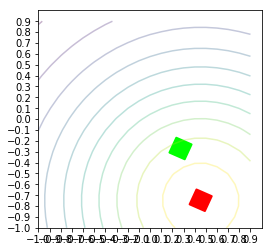

(array([ 0.74894027, -0.09000902,  1.14814463]), array([1., 1., 1.]))
[ 0.74894027 -0.09000902  1.14814463]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 1.  -1.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 1.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 1.   0.  -1.   0.   1.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.   0. ]
 [ 1.   0.  -1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 0.   0.   1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 0.   0.   1.   0.   1.   0.   0. ]]
Progress = 0.78; reward = 0.70


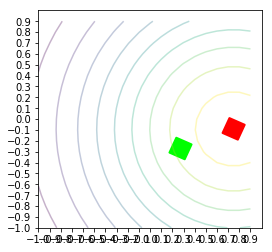

(array([ 0.18262541, -0.03267249,  1.14814463]), array([1., 1., 1.]))
[ 0.18262541 -0.03267249  1.14814463]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 1.  -1.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 1.   0.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 1.   0.   0.   0.   1.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 1.   0.  -1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 1.   0.  -1.   0.   1.   0.   0. ]
 [ 0.  -2.  -1.   0.   0.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.   0. ]
 [ 1.   0.  -1.   0.   1.   0.   0. ]
 [ 0.   0.   1.   0.   1.   0.   0. ]]
Progress = 0.82; reward = 0.05


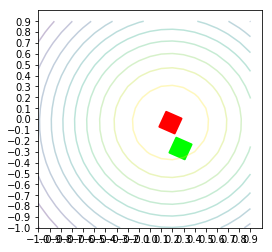

In [93]:
explorations[0].replay()

In [100]:
a = np.array([2,3])
b = np.array([1])
np.concatenate([a,b])

array([2, 3, 1])

In [3]:
for project_name in action_types:
    prefix = "..\\experiments\\human_evaluation_2d\\" + project_name + "\\"
    print ("============")
    print (prefix)
    al = action_lns[project_name]
    for n in range(2):
        al.env.reset()
        explorations = al.learn_one_setup(verbose = True)
        explorations[0].save(prefix + str(n) + ".dat")
        explorations[0].save_visualization_to_file(prefix + str(n) + ".mp4")

..\experiments\human_evaluation_2d\SlideAround\
action_level = 0
exploration_index = 0


KeyboardInterrupt: 

In [49]:
feedback = "..\\experiments\\human_evaluation_2d\\slidearound.txt"

In [38]:
import numpy as np
with open(feedback, 'r') as fh:
    wrong_demonstration_indices = []
    correct_demonstration_indices = []
    for line in fh:
        values = [int(v) for v in line.split()]
        index = values[0]
        average_score = np.mean(values[1:])
        if average_score <= 2.5:
            wrong_demonstration_indices.append(index)
        if average_score >= 6:
            correct_demonstration_indices.append(index)

print (len(wrong_demonstration_indices))
print (wrong_demonstration_indices)
print (len(correct_demonstration_indices))
print (correct_demonstration_indices)

19
[0, 2, 3, 4, 6, 8, 9, 11, 12, 16, 17, 20, 21, 23, 24, 25, 27, 28, 29]
4
[10, 13, 18, 19]


In [6]:
p = progress_estimators["SlideAround"]

In [7]:
reload(block_movement_env)
import pickle

In [8]:
prefix = os.path.join( "..", "experiments", "human_evaluation_2d" , "SlideAround")

In [9]:
al = action_lns["SlideAround"]
prev_demonstrations = []
for index in range(30):
    stored_config_file = os.path.join(prefix, str(index) + ".dat")
    with open(stored_config_file, 'rb') as fh:
        # need this encoding 
        stored_config = pickle.load(fh, encoding='latin-1')
        
        e = block_movement_env.BlockMovementEnv(al.config, al.project.speed, al.project.name, 
                progress_estimator = p, session = al.session)
        e.reset_env_to_state(stored_config['start_config'], stored_config['action_storage'])
        
        prev_demonstrations.append(e)

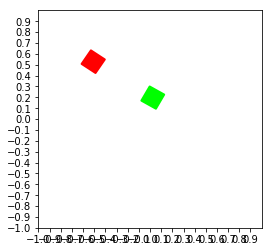

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[0.42125762 0.78644046 1.26953124]
[[ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.77; reward = 0.77


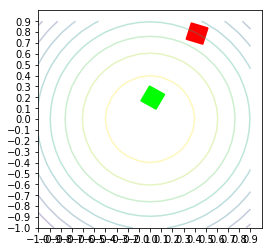

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[0.42125762 0.78644046 1.26953124]
[[ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.77; reward = 0.00


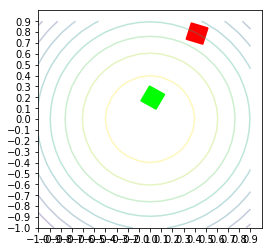

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.71070855  0.22431777 -0.17699204]
[[ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0. ]
 [ 1.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.  -0.5]
 [ 1.  -1.  -1.   0.   1.   0.  -0.5]
 [ 0.   0.  -1.   0.   1.   0.  -0.5]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 1.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]]
Progress = 0.72; reward = -0.06


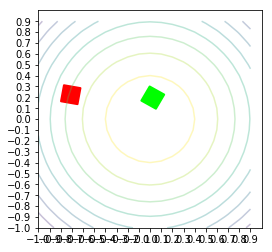

In [10]:
prev_demonstrations[12].replay()

In [33]:
prev_demonstrations[12].action_storage

[[0,
  [-0.50926944  0.52800546  0.98026568] - 0.075,
  [ 0.42125762  0.78644046  1.26953124] - 0.075,
  array([ 0.37473126,  0.77351871,  1.25506796,  0.42125762,  0.78644046,
          1.26953124,  0.02447508,  0.19758503,  1.05180981,  0.02447508,
          0.19758503,  1.05180981]),
  0.77434617,
  True,
  array([ 0.,  0.,  0.], dtype=float32),
  array([ 2. ,  2. ,  0.5], dtype=float32)],
 [0,
  [ 0.42125762  0.78644046  1.26953124] - 0.075,
  [ 0.42125762  0.78644046  1.26953124] - 0.075,
  array([ 0.37473126,  0.77351871,  1.25506796,  0.42125762,  0.78644046,
          1.26953124,  0.02447508,  0.19758503,  1.05180981,  0.02447508,
          0.19758503,  1.05180981]),
  0.77434617,
  True,
  array([ 0.,  0.,  0.], dtype=float32),
  array([ 2. ,  2. ,  0.5], dtype=float32)],
 [0,
  [ 0.42125762  0.78644046  1.26953124] - 0.075,
  [-0.71070855  0.22431777 -0.17699204] - 0.075,
  array([-0.61086184,  0.27390061, -0.04939937, -0.71070855,  0.22431777,
         -0.17699204,  0.024475

In [11]:
def create_batch_size ( samples, batch_size ):
    if len(samples) < batch_size:
        repeat = batch_size // len(samples)
        remain = batch_size % len(samples)
        
        q = samples * repeat + samples[:remain]
        return np.stack(q)

In [39]:
negative_samples = []
negative_samples += [prev_demonstrations[index].get_feature_only() for index in wrong_demonstration_indices if index < 15]

negative_data = create_batch_size(negative_samples, c.batch_size)

positive_samples = []
positive_samples += [prev_demonstrations[index].get_feature_only() for index in correct_demonstration_indices if index < 15]

positive_data = create_batch_size(positive_samples, c.batch_size)

In [40]:
# The other half
negative_samples_2 = []
negative_samples_2 += [prev_demonstrations[index].get_feature_only() for index in wrong_demonstration_indices if index >= 15]

negative_data_2 = create_batch_size(negative_samples_2, c.batch_size)

positive_samples_2 = []
positive_samples_2 += [prev_demonstrations[index].get_feature_only() for index in correct_demonstration_indices if index >= 15]

positive_data_2 = create_batch_size(positive_samples_2, c.batch_size)

In [13]:
print (negative_data.shape)
print (positive_data.shape)

(30, 20, 7)
(30, 20, 7)


In [41]:
for project_name in action_types:
    saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model/' + project_name))

    saver.restore(sess, '../progress_' + project_name + '.mod')

INFO:tensorflow:Restoring parameters from ../progress_SlideAround.mod


In [42]:
for i in range(10):
    print ('-------------------------------')
    lr_decay = c.lr_decay ** i
    new_learning_rate = c.learning_rate * 0.05 * lr_decay
    print ('Rate = %.5f' % (new_learning_rate))
    p.assign_lr(new_learning_rate, sess = sess)
    
#     # Update with negative samples
    p.update(negative_data_2, np.zeros(c.batch_size), sess = sess)
    
#     # Update with positive samples
    p.update(positive_data_2, np.ones(c.batch_size), sess = sess)

-------------------------------
Rate = 0.00005
-------------------------------
Rate = 0.00005
-------------------------------
Rate = 0.00005
-------------------------------
Rate = 0.00004
-------------------------------
Rate = 0.00004
-------------------------------
Rate = 0.00004
-------------------------------
Rate = 0.00004
-------------------------------
Rate = 0.00003
-------------------------------
Rate = 0.00003
-------------------------------
Rate = 0.00003


In [43]:
saver.save(sess, "../progress_" + project_name + ".mod.2")

'../progress_SlideAround.mod.2'

In [45]:
for project_name in action_types:
    saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model/' + project_name))

    saver.restore(sess, '../progress_' + project_name + '.mod.2')

INFO:tensorflow:Restoring parameters from ../progress_SlideAround.mod.2


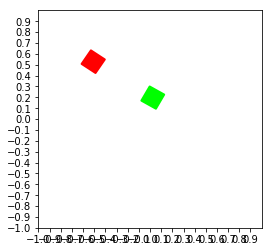

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[0.42125762 0.78644046 1.26953124]
[[ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.57; reward = 0.57


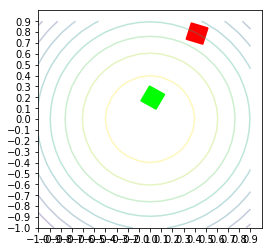

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[0.42125762 0.78644046 1.26953124]
[[ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.57; reward = 0.00


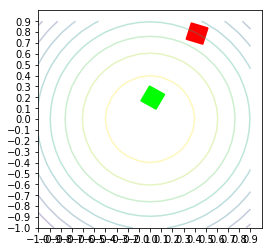

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.71070855  0.22431777 -0.17699204]
[[ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0. ]
 [ 1.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.  -0.5]
 [ 1.  -1.  -1.   0.   1.   0.  -0.5]
 [ 0.   0.  -1.   0.   1.   0.  -0.5]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 1.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]]
Progress = 0.13; reward = -0.44


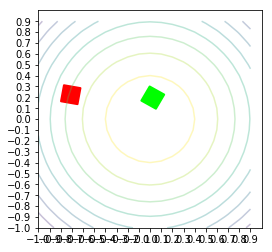

In [46]:
prev_demonstrations[12].replay()

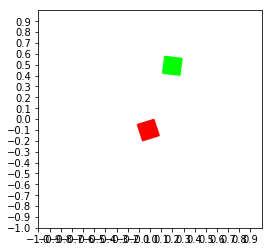

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.46145262  0.33233556  0.14982787]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.   0.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [-1.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.56; reward = 0.56


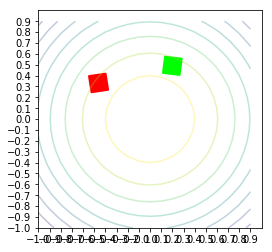

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.83144515  0.24279438  0.17549452]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 1.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 1.  -1.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 1.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 1.   2.   1.   0.   1.   0.   0.5]]
Progress = 0.19; reward = -0.36


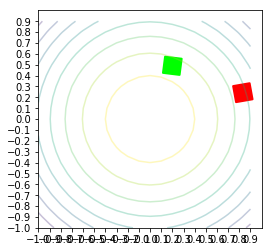

In [81]:
prev_demonstrations[0].replay()

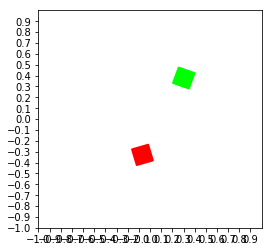

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.27468988  0.8918439   0.19725585]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [-1.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [-1.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.79; reward = 0.79


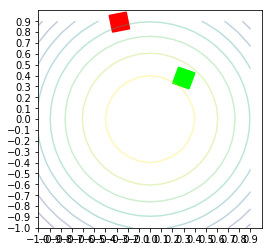

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.38915941 -0.5767885   1.12457237]
[[ 0.  -2.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [-1.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 1.  -1.  -1.   0.   1.   0.  -1. ]
 [ 0.  -1.  -1.   0.   1.   0.  -1. ]
 [ 1.   0.  -1.   0.   1.   0.  -1. ]
 [ 0.   0.   1.   0.   1.   0.  -1. ]
 [ 1.   2.   1.   0.   1.   0.  -0.5]
 [ 0.   1.   1.   0.   1.   0.  -0.5]
 [ 0.   2.   1.   0.   1.   0.  -0.5]
 [ 0.   1.   1.   0.   1.   0.  -0.5]
 [ 0.   2.   1.   0.   1.   0.  -0.5]]
Progress = 0.08; reward = -0.71


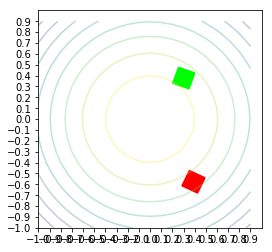

In [90]:
prev_demonstrations[2].replay()

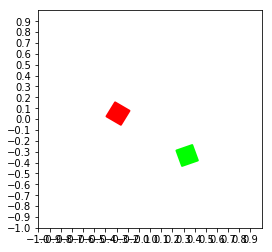

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.89213733  0.34272736  0.14389568]
[[ 0.   0.  -1.   0.  -1.   0.   1. ]
 [ 0.  -1.  -1.   0.  -1.   0.   1. ]
 [ 0.   0.  -1.   0.  -1.   0.   1. ]
 [ 0.  -1.  -1.   0.  -1.   0.   1. ]
 [ 0.   0.  -1.   0.  -1.   0.   1. ]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [-1.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.66; reward = 0.66


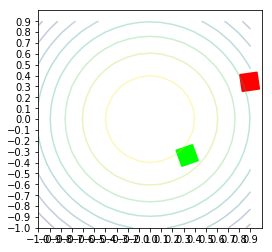

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.56563562 -0.47985095  0.14622574]
[[ 0.   0.   0.   0.   0.   0.   1. ]
 [ 0.  -1.  -1.   0.  -1.   0.   1. ]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [-1.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -2.  -1.   0.   0.   0.   0. ]
 [ 0.  -1.  -1.   0.   0.   0.   0. ]
 [ 1.  -2.  -1.   0.   0.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 1.   0.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.   0. ]
 [ 1.   1.   1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 0.   2.   1.   0.   1.   0.   0. ]
 [ 0.   2.   1.   0.   1.   0.   0. ]
 [ 0.   2.   1.   0.   1.   0.   0. ]]
Progress = 0.12; reward = -0.54


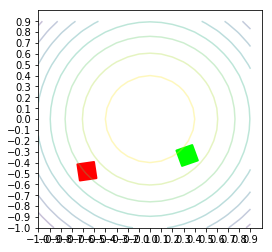

In [91]:
prev_demonstrations[3].replay()

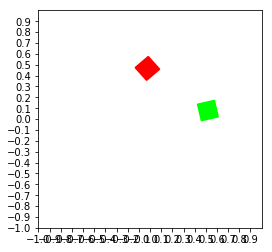

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.79469355  0.29144756  0.01753818]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.45; reward = 0.45


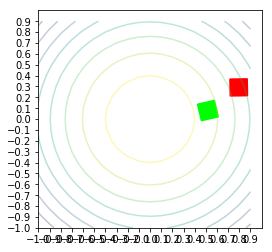

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.57477568 -0.44249176  0.26738601]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.81; reward = 0.36


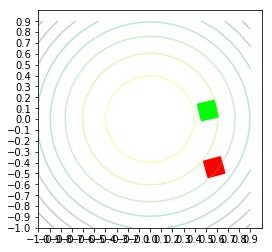

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.5536921   0.04493412  0.80928455]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [-1.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.  -1.  -1.   0.  -1.   0.   0. ]
 [-1.   1.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   2.   1.   0.  -1.   0.   0.5]
 [ 0.   2.   1.   0.  -1.   0.   1. ]]
Progress = 0.88; reward = 0.07


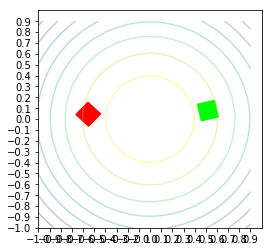

In [70]:
prev_demonstrations[10].replay()

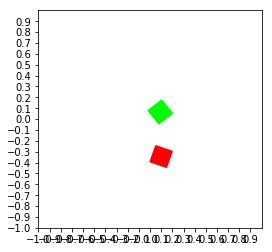

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.16522665 -0.26798334  0.11862508]
[[ 0.   0.   0.   0.   0.   0.   1. ]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.   0.   0.  -1.   0.   0.5]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]]
Progress = 0.52; reward = 0.52


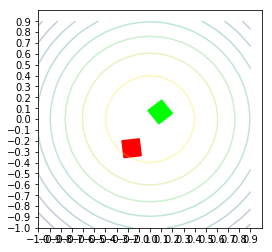

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.68967379  0.10547168  0.71620143]
[[ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 1.   0.  -1.   0.   1.   0.  -0.5]
 [ 0.   0.  -1.   0.   1.   0.  -0.5]
 [ 0.  -1.  -1.   0.   1.   0.  -0.5]
 [ 1.   0.  -1.   0.   1.   0.  -0.5]
 [ 0.   0.   1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 1.   0.   1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 0.   0.   1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 0.   1.   1.   0.   1.   0.   0. ]
 [ 0.   0.   1.   0.   1.   0.   0. ]]
Progress = 0.20; reward = -0.32


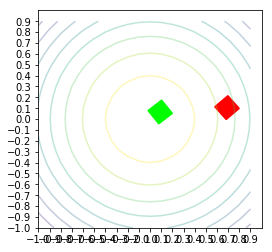

In [82]:
prev_demonstrations[16].replay()

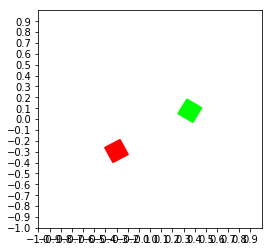

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.0509483   0.85825823 -0.29786026]
[[ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [-1.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [ 0.  -1.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [ 0.  -1.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [-1.   0.   0.   0.  -1.   0.  -1. ]
 [ 0.   1.   1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.76; reward = 0.76


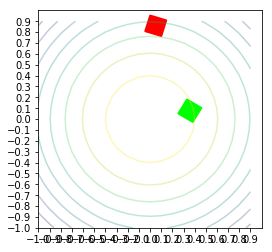

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.0509483   0.85825823 -0.29786026]
[[ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [-1.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [ 0.  -1.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [ 0.  -1.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [-1.   0.   0.   0.  -1.   0.  -1. ]
 [ 0.   1.   1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.76; reward = 0.00


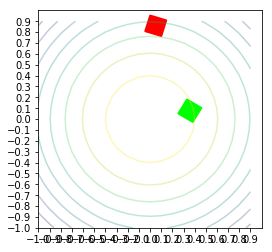

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.07171718 -0.86668351 -0.23004993]
[[ 0.   0.   0.   0.   0.   0.  -0.5]
 [-1.  -1.  -1.   0.  -1.   0.  -1. ]
 [ 0.  -1.  -1.   0.  -1.   0.  -1. ]
 [ 0.  -1.  -1.   0.  -1.   0.  -1. ]
 [-1.   1.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   2.   1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   1.   0.   0.5]
 [ 0.  -1.  -1.   0.   1.   0.   0.5]
 [ 1.  -1.  -1.   0.   1.   0.   0.5]
 [ 0.   0.  -1.   0.   1.   0.   0.5]
 [ 1.   1.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]]
Progress = 0.07; reward = -0.69


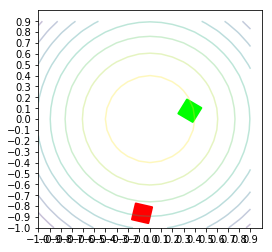

In [83]:
prev_demonstrations[17].replay()

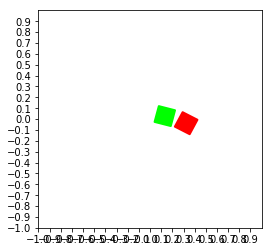

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[0.84831608 0.58845618 0.02700747]
[[ 0.   0.   1.   0.   1.   0.  -0.5]
 [ 0.   1.   1.   0.   1.   0.  -0.5]
 [ 0.   0.   1.   0.   1.   0.  -0.5]
 [ 0.   1.   1.   0.   1.   0.  -0.5]
 [ 0.   0.   1.   0.   1.   0.  -0.5]
 [ 0.   0.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 1.   0.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   0.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   0.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   0.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]]
Progress = 0.05; reward = 0.05


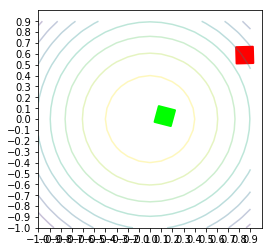

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.53520214 -0.04011001  0.15527732]
[[ 0.   1.   1.   0.   1.   0.  -0.5]
 [ 1.   2.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 1.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   1.   0.   0.5]
 [ 1.   0.  -1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 1.   1.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]]
Progress = 0.84; reward = 0.79


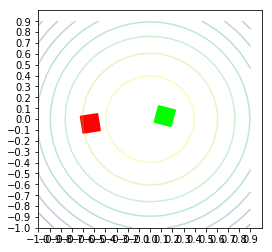

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.60372459 -0.02319774  0.40270725]
[[ 0.   1.   1.   0.   1.   0.  -0.5]
 [ 1.   1.   1.   0.   1.   0.  -1. ]
 [ 0.   2.   1.   0.   1.   0.  -1. ]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   0.   0.   0.   1.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -2.  -1.   0.   0.   0.   0.5]
 [ 1.  -1.  -1.   0.   1.   0.   0.5]
 [ 0.  -1.  -1.   0.   1.   0.   0.5]
 [ 1.   1.  -1.   0.   1.   0.   0.5]
 [ 1.   0.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.   0.5]
 [ 0.   2.   1.   0.   1.   0.   0.5]
 [ 0.   1.   1.   0.   1.   0.  -1. ]]
Progress = 0.86; reward = 0.02


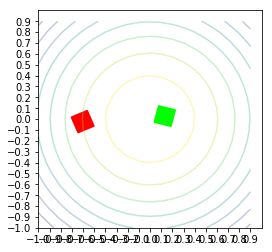

In [47]:
prev_demonstrations[18].replay()

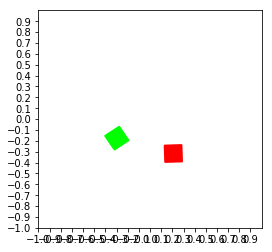

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.66812472 -0.52930078  0.6571263 ]
[[ 0.   0.   0.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [-1.   0.  -1.   0.   0.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.44; reward = 0.44


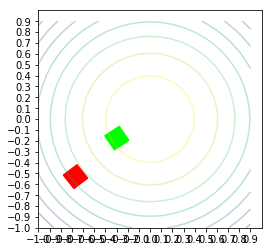

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.50539326  0.43798172  1.44245024]
[[-1.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [-1.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [-1.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   1. ]
 [ 0.   1.   1.   0.  -1.   0.   1. ]
 [ 0.   1.   1.   0.  -1.   0.   1. ]
 [-1.   1.   1.   0.  -1.   0.   1. ]]
Progress = 0.77; reward = 0.32


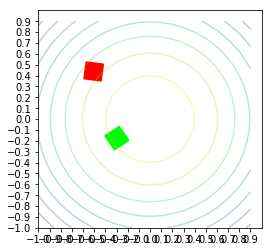

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.40903607  0.60848286 -0.448662  ]
[[ 0.   0.   0.   0.   0.   0.  -0.5]
 [-1.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [-1.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [-1.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   1. ]
 [ 0.   1.   1.   0.  -1.   0.   1. ]
 [ 0.   1.   1.   0.  -1.   0.   1. ]
 [-1.   2.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.86; reward = 0.10


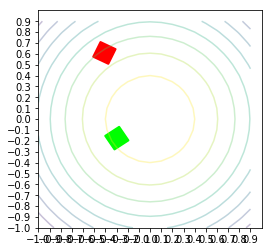

In [48]:
prev_demonstrations[19].replay()

In [16]:
new_demonstrations = []
for index in range(30):
    stored_config_file = os.path.join(prefix, str(index) + ".dat")
    with open(stored_config_file, 'rb') as fh:
        # need this encoding 
        stored_config = pickle.load(fh, encoding='latin-1')
        
        e = block_movement_env.BlockMovementEnv(al.config, al.project.speed, al.project.name, 
                progress_estimator = p, session = al.session)
        e.reset_env_to_state(stored_config['start_config'], [])
        
        new_demonstrations.append(e)

In [18]:
a = action_learner_search.ActionLearner_Search(c, projects['SlideAround'], p, session = sess, env = new_demonstrations[1])

In [19]:
a.learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.406206876039505), (0, 0.36988624930381775), (0, 0.3405088782310486), (0, 0.3372363746166229), (0, 0.329643577337265), (0, 0.25195878744125366), (0, 0.23773834109306335), (0, 0.20673714578151703), (0, 0.19954772293567657)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(4, 0.6749442219734192), (1, 0.6506272554397583), (4, 0.5882835984230042), (1, 0.542798638343811), (5, 0.5169610381126404), (5, 0.5076903700828552), (1, 0.5011847019195557), (5, 0.4944741129875183), (5, 0.4827463924884796)]
action_level = 2
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(3, 0.7209612727165222), (2, 0.6820040345191956), (0, 0.6749442219734192), (

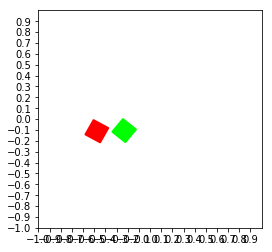

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.37860607  0.15681283  0.53668459]
[[ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   1.   1.   0.  -1.   0.  -0.5]]
Progress = 0.37; reward = 0.37


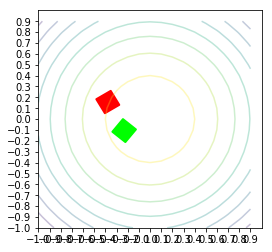

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[ 0.3517911  -0.03160484 -0.26783624]
[[ 0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.  -1.   0.  -1.   0.  -1. ]
 [-1.   1.   1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.  -1. ]
 [ 0.   1.   1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.  -1. ]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]]
Progress = 0.54; reward = 0.17


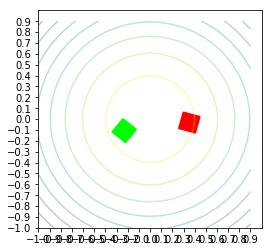

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.09713236 -0.61058078  0.05453971]
[[-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -1. ]
 [-1.   1.  -1.   0.  -1.   0.  -1. ]
 [ 0.   0.   1.   0.  -1.   0.  -1. ]
 [ 0.   1.   1.   0.  -1.   0.  -1. ]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [-1.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.  -1. ]
 [-1.   0.   1.   0.  -1.   0.  -1. ]]
Progress = 0.72; reward = 0.18


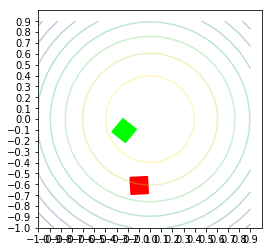

In [21]:
_[0].replay()

In [24]:
a = action_learner_search.ActionLearner_Search(c, projects['SlideAround'], p, session = sess, env = new_demonstrations[2])

In [25]:
a.learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.8027162551879883), (0, 0.7241595387458801), (0, 0.6653658747673035), (0, 0.6316121816635132), (0, 0.6284366250038147), (0, 0.6159166693687439), (0, 0.5945696830749512), (0, 0.5500973463058472), (0, 0.544940710067749)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(0, 0.8027162551879883), (0, 0.8027162551879883), (0, 0.8027162551879883), (0, 0.8027162551879883), (0, 0.8027162551879883), (0, 0.8027162551879883), (0, 0.8027162551879883), (0, 0.8027162551879883), (0, 0.8027162551879883)]
action_level = 2
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(0, 0.8027162551879883), (0, 0.8027162551879883), (0, 0.8027162551879883), (0, 

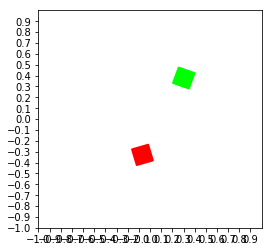

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.03623891  0.88720119  0.16584031]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [-1.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.80; reward = 0.80


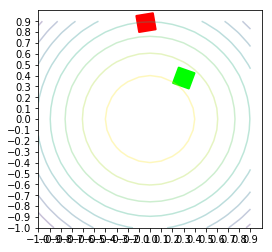

(array([0., 0., 0.], dtype=float32), array([2. , 2. , 0.5], dtype=float32))
[-0.03623891  0.88720119  0.16584031]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [-1.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.80; reward = 0.00


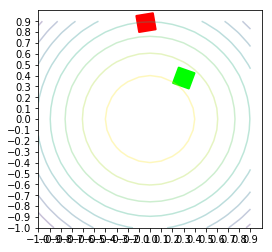

In [26]:
_[0].replay()

In [28]:
new_prefix = os.path.join( "..", "experiments", "human_evaluation_2d" , "SlideAroundNew")
for index in range(15, 30):
    print ('Re-demonstrate for ' + str(index))
    a = action_learner_search.ActionLearner_Search(c, projects['SlideAround'], p, session = sess, env = new_demonstrations[index])
    explorations = a.learn_one_setup(verbose = True)
    explorations[0].save(os.path.join( new_prefix, str(index) + ".dat" ))
    explorations[0].save_visualization_to_file(os.path.join( new_prefix, str(index) + ".mp4" ))

Re-demonstrate for 15
action_level = 0
exploration_index = 0
[(0, 0.7823077440261841), (0, 0.7810226082801819), (0, 0.6870688796043396), (0, 0.6685193777084351), (0, 0.6539229154586792), (0, 0.6515626907348633), (0, 0.6368178725242615), (0, 0.6244909167289734), (0, 0.6240160465240479)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
[(0, 0.7823077440261841), (0, 0.7823077440261841), (0, 0.7823077440261841), (0, 0.7823077440261841), (0, 0.7823077440261841), (0, 0.7823077440261841), (0, 0.7823077440261841), (0, 0.7823077440261841), (0, 0.7823077440261841)]
action_level = 2
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7


KeyboardInterrupt: 